<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 8: Data Modelling

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

We will use the used car dataset from the notes for this question.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Lab8Q1.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


a) Draw a scatterplot to investigate the relationship between curb-weight and the price of cars.

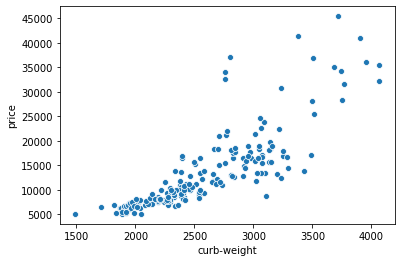

In [2]:
#your solution
sns.scatterplot(x='curb-weight', y='price', data=df)

b) Develop a SLRM for the data in (a) using `scikitlearn`. Ensure you split the dataset into training and test data.

In [3]:
#your solution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df.dropna(subset=['curb-weight', 'price'], inplace=True)
lm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df[['curb-weight']],
                                                   df.price, test_size=0.2,
                                                   random_state=0)
lm.fit(x_train,y_train)
print(lm.intercept_)
print(lm.coef_)


-19891.302553788304
[12.92585407]


yhat = -19891.302553788304 + 12.92585407x

c) Now, make predictions using your test data. Display the predicted results.

In [4]:
#your solution
yhats = lm.predict(x_test)
yhats

array([ 4331.74796681, 12164.8155311 , 24444.37689426, 20114.21578199,
       20838.06360971,  9515.01544747, 12513.81359089,  5766.51776819,
       15848.68394005,  7007.39975857, 11453.89355744, 16301.08883238,
        9372.83105274,  9515.01544747, 17865.11717442, 18291.67035861,
        5391.66800026, 15098.98440419,  9695.9774044 ,  5236.55775146,
       10083.7530264 , 14362.2107224 , 32665.22008055,  8144.87491642,
       11686.55893064, 15732.35125345,  8661.90907908,  9243.57251207,
       16016.72004291, 32665.22008055, 25413.81594925, 12423.33261243,
        9708.90325847, 25155.29886792,  7614.9148997 , 13237.66141862,
       14943.87415539, 16611.30932997, 11195.37647611, 21859.20608096,
        6606.69828251])

d) Evaluate your model by charting a bar graph to compare the actual vs predicted output.

      Actual     Predicted
4    17450.0  16611.309330
5    15250.0  12513.813591
7    18920.0  18291.670359
13   21105.0  15848.683940
17   36880.0  25413.815949
19    6295.0   4331.747967
23    7957.0   7614.914900
34    7129.0   5391.668000
38    9095.0   9695.977404
47   32250.0  32665.220081
48   35550.0  32665.220081
58   15645.0  12423.332612
63   10795.0  11686.558931
64   11245.0  11453.893557
77    6189.0   5236.557751
83   14869.0  17865.117174
86    8189.0  11195.376476
101  13499.0  20114.215782
109  12440.0  21859.206081
110  13860.0  24444.376894
114  17075.0  25155.298868
125  22018.0  16016.720043
126  32528.0  15732.351253
128  37028.0  16301.088832
133  12170.0  14943.874155
134  15040.0  15098.984404
138   5118.0   6606.698283
149  11694.0  14362.210722
150   5348.0   5766.517768
154   7898.0   9708.903258
156   6938.0   7007.399759
158   7898.0   9515.015447
163   8058.0   8144.874916
174  10698.0  12164.815531
181  15750.0  20838.063610
183   7975.0   8661.909079
1

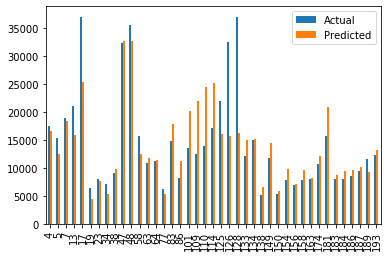

In [5]:
#your solution
vs = pd.DataFrame({'Actual': y_test, 'Predicted': yhats})
vs.sort_index(inplace=True)
print(vs)

vs.plot(kind='bar')

State your observations.

#### Key your observations/conclusion here
The model works well for most of the values, albeit having 4 major outliers, at x=17 and at around x=126.

e) Evaluate your model by plotting a residual plot.

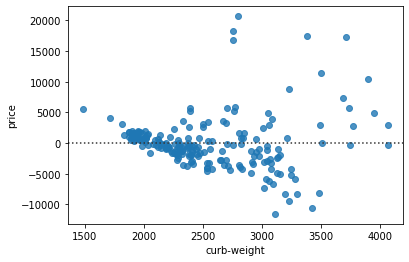

In [6]:
#your solution
sns.residplot(df['curb-weight'], df['price'])

State your observations/conclusion.

#### Key your observations/conclusion here
There is a fan-shape distribution of residual values. As x gets larger, my model gets more inaccurate. Thus, it is not a suitable model.

## Q2

We will use the data Lab8Q2.csv for this question. This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [7]:
df = pd.read_csv("Lab8Q2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


a) Perform relevant EDA for the following features: `ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS`

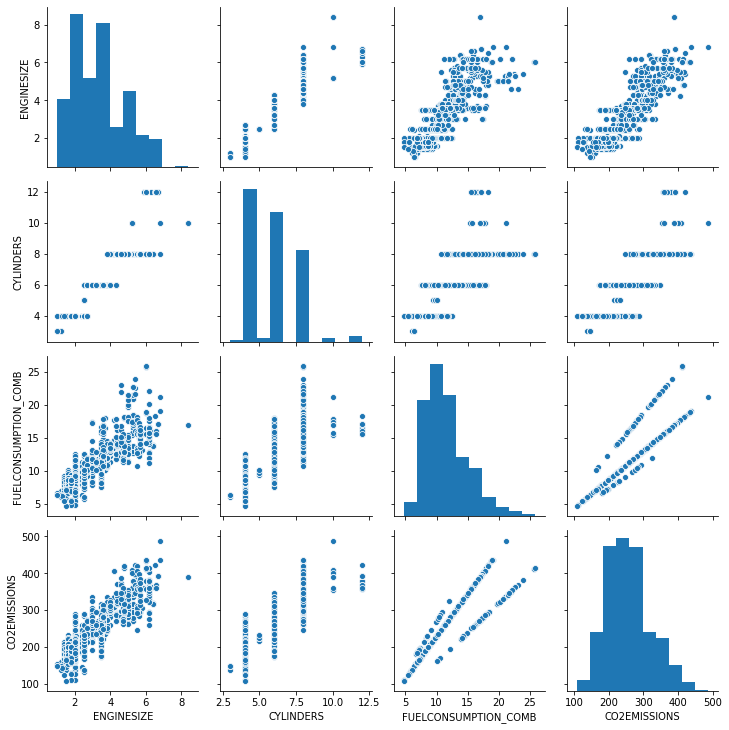

In [8]:
#your solution
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sns.pairplot(df2)

b) Based on the observations from (a), select a suitable feature and develop a SLRM to predict the CO2 emissions. Ensure you split the dataset into training and test data.

In [9]:
#your solution
lm2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['ENGINESIZE']], df['CO2EMISSIONS'], test_size=0.2, random_state=0)
lm2.fit(X_train, y_train)
print(lm2.intercept_, lm2.coef_)

126.18920154724933 [39.24838431]


Hence, state the equation of your model.

y = 126.18920154724933 + 39.24838431x

c) Now, make predictions using your test data. Display the predicted results.

In [10]:
#your solution
yhats2 = lm2.predict(X_test)
yhats2

array([342.05531526, 220.3853239 , 220.3853239 , 232.15983919,
       224.31016233, 298.88209252, 220.3853239 , 267.48338507,
       220.3853239 , 322.43112311, 267.48338507, 393.07821487,
       243.93435448, 298.88209252, 181.13693958, 283.1827388 ,
       314.58144625, 188.98661645, 263.55854664, 385.22853801,
       196.83629331, 263.55854664, 263.55854664, 204.68597017,
       224.31016233, 243.93435448, 275.33306193, 334.2056384 ,
       342.05531526, 204.68597017, 345.9801537 , 224.31016233,
       263.55854664, 243.93435448, 196.83629331, 188.98661645,
       349.90499213, 220.3853239 , 232.15983919, 267.48338507,
       196.83629331, 196.83629331, 220.3853239 , 204.68597017,
       342.05531526, 204.68597017, 220.3853239 , 188.98661645,
       334.2056384 , 357.75466899, 310.65660781, 271.4082235 ,
       267.48338507, 196.83629331, 220.3853239 , 188.98661645,
       306.73176938, 196.83629331, 251.78403135, 204.68597017,
       188.98661645, 224.31016233, 204.68597017, 334.20

e) Evaluate your model by plotting a residual plot.

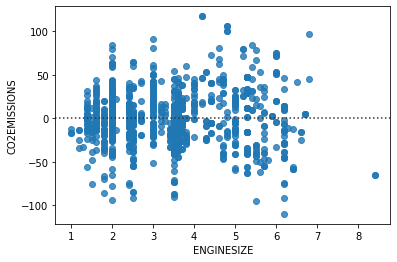

In [11]:
#your solution
sns.residplot(df['ENGINESIZE'],df['CO2EMISSIONS'])

State your observations/conclusion.

The residual plot looks good. There is a random even distribution of residuals above and below the mean and the spread is even as x increases.

f) Calculate the MSE.

In [12]:
#your solution
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhats2)

1181.528809303555

g) Another common approach to analyze the model is to draw a scatterplot of Actual vs Predicted. Plot a scatterplot of Actual vs Predicted.

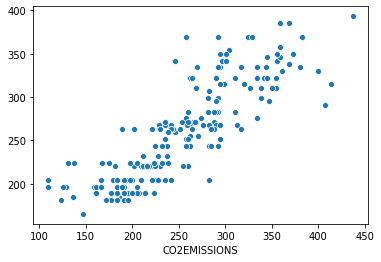

In [13]:
#your solution
sns.scatterplot(y_test, yhats2)

What insights can you draw from the scatterplot?

There is a moderately strong positive correlation between the predicted and actual values. The model I made is somewhat applicable, but accuracy still leaves some to be desired.

## Q3

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

a) Develop a MLRM using the 3 attributes stated above. Write the equation for the MLRM.

In [14]:
#your solution
xtr, xte, ytr, yte = train_test_split(df[['FUELCONSUMPTION_COMB',
                                           'ENGINESIZE',
                                           'CYLINDERS']],df['CO2EMISSIONS'],
                                          test_size=0.2,
                                          random_state=0)
mlm = LinearRegression()
mlm.fit(xtr, ytr)
print(mlm.intercept_, mlm.coef_)

69.05220992553814 [ 8.98695981 11.98993058  7.54469599]


y = 69.05220992553814 + 8.98695981a + 11.98993058b + 7.54469599c
where a,b,c are fuel consumption, enginesize and cylinders respectively

c) Now, make predictions using your test data. Display the predicted results.

In [15]:
#your solution
yhats3 = mlm.predict(xte)
yhats3

array([334.65227307, 209.78816154, 217.87642537, 229.37322867,
       194.81062694, 296.29986196, 210.68685752, 265.32765366,
       207.09207359, 319.67034797, 279.70678935, 381.69354216,
       224.88194401, 291.80638206, 185.21648722, 278.922146  ,
       348.72672119, 205.58839296, 254.24300481, 378.91867664,
       195.40463534, 229.97821332, 251.54691687, 217.57393304,
       180.43149124, 260.82978325, 266.82694379, 358.3164704 ,
       291.51486598, 166.34826212, 336.74996211, 222.67020235,
       284.79866816, 242.85586363, 195.40463534, 194.80404119,
       312.7854677 , 214.28164144, 224.16949248, 250.04982198,
       192.7085474 , 192.7085474 , 207.09207359, 187.91696567,
       311.28617756, 200.4987094 , 229.55947312, 188.51316932,
       386.17604581, 370.52572523, 317.87076076, 320.44840557,
       270.71982954, 171.13984386, 217.87642537, 188.51316932,
       295.10306416, 182.82289161, 253.34211358, 204.99218931,
       199.29752109, 209.18976263, 211.28306117, 358.31

d) Calculate the MSE.

In [16]:
#your solution
mean_squared_error(yte, yhats3)

589.2351940837912

e) Evaluate the model by plotting a scatterplot of Actual vs Predicted.

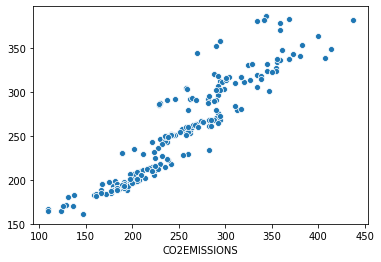

In [17]:
#your solution
sns.scatterplot(yte, yhats3)

What insights can you draw from the scatterplot?

There is a stronger correlation between yte and yhats3 than before. The new model is more accurate.

f) Draw a distribution plot to show the predicted and actual for both SLRM and MLRM and compare the results.

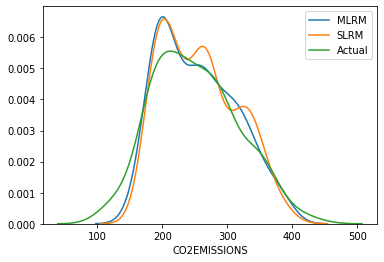

In [32]:
#your solution
sns.distplot(yhats3,hist=False,label='MLRM')
sns.distplot(yhats2,hist=False, label='SLRM')
sns.distplot(yte,hist=False,label='Actual')


What insights and conclusion can you draw from the distribution plots?

The MLRM more accurately follows the trend of the actual data, but both SLRM nad MLRM have a very large peak at 200 CO2EMISSIONS that is not present in the actual dataset. However, the SLRM has two more peaks at ~270 and ~340 which deviate more from the actual than the MLRM. Both models underestimate the kurtosis at the left of the graph, but overall the MLRM is more accurate.